In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

df = pd.read_csv('../dataset/chicago_crime_cleaned.csv')
print("Loaded data shape:", df.shape)
df.head()


Loaded data shape: (1347235, 17)


,ID,Date,Crime_Type,Description,Location_Type,Arrest,Domestic,District,Ward,Community Area,Latitude,Longitude,Year,Month,Day,Hour,DayOfWeek
0,13992566,2025-10-07 00:00:00,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,2,5.0,41.0,41.794501,-87.585394,2025,10,7,0,Tuesday
1,13990318,2025-10-07 00:00:00,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,3,5.0,43.0,41.770959,-87.591118,2025,10,7,0,Tuesday
2,13990772,2025-10-07 00:00:00,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,7,6.0,69.0,41.761006,-87.630899,2025,10,7,0,Tuesday
3,13990291,2025-10-07 00:00:00,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,4,7.0,43.0,41.752450,-87.569900,2025,10,7,0,Tuesday
4,13992893,2025-10-07 00:00:00,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,4,10.0,51.0,41.700184,-87.563191,2025,10,7,0,Tuesday


In [23]:
# Define 'Day' (6 AM–6 PM) vs 'Night'
df['Light_Condition'] = df['Hour'].apply(lambda h: 'Day' if 6 <= h < 18 else 'Night')


In [24]:
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)


In [25]:
# Cluster the city into spatial zones based on latitude/longitude
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Zone'] = kmeans.fit_predict(coords)

# Quick check
df[['Latitude', 'Longitude', 'Zone']].head()


/Users/prateek/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/prateek/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/prateek/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/prateek/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/prateek/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/prateek/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = cl

,Latitude,Longitude,Zone
0,41.794501,-87.585394,0
1,41.770959,-87.591118,0
2,41.761006,-87.630899,0
3,41.752450,-87.569900,0
4,41.700184,-87.563191,0


In [26]:
np.random.seed(42)
df['Temperature'] = np.random.normal(loc=25, scale=5, size=len(df)).round(1)
df['Rain'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])  # 20% rainy days


In [27]:
# Label-encode crime types and location types
le_crime = LabelEncoder()
df['Crime_Type_Label'] = le_crime.fit_transform(df['Crime_Type'])

le_loc = LabelEncoder()
df['Location_Type_Label'] = le_loc.fit_transform(df['Location_Type'].astype(str))


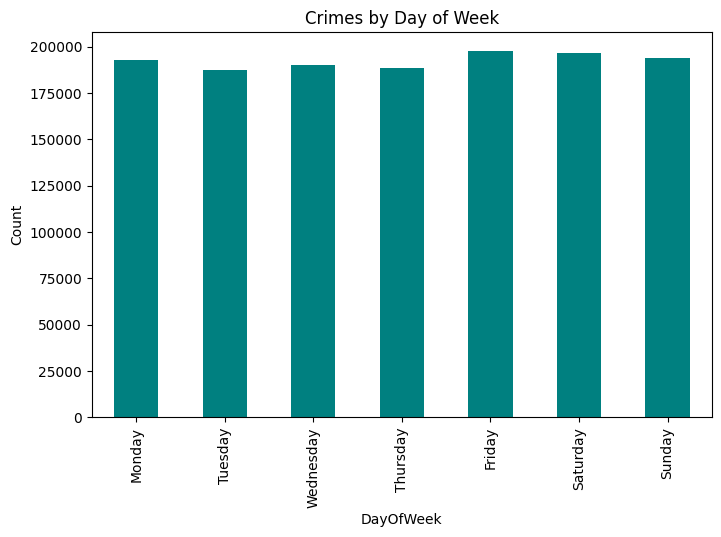

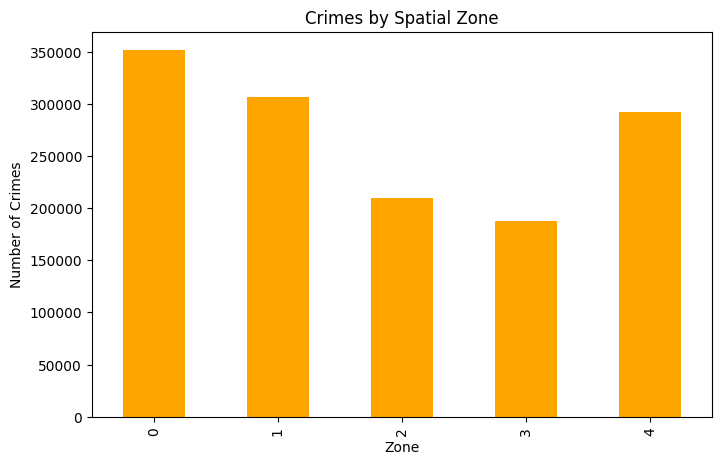

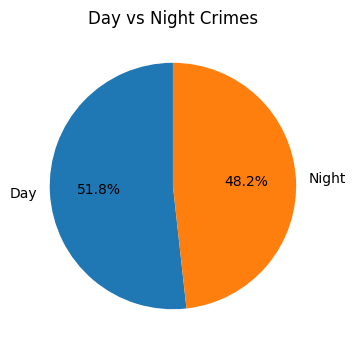

In [28]:
# Crime distribution by weekday
plt.figure(figsize=(8,5))
df['DayOfWeek'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='teal')
plt.title('Crimes by Day of Week')
plt.ylabel('Count')
plt.show()

# Crime distribution by zone
plt.figure(figsize=(8,5))
df['Zone'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Crimes by Spatial Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.show()

# Crime distribution by Light Condition
plt.figure(figsize=(5,4))
df['Light_Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Day vs Night Crimes')
plt.ylabel('')
plt.show()


In [29]:
# Keep only relevant columns for modeling
final_cols = [
    'Crime_Type', 'Crime_Type_Label', 'Latitude', 'Longitude', 'Zone',
    'Hour', 'DayOfWeek', 'IsWeekend', 'Light_Condition', 'Temperature', 'Rain',
    'Location_Type_Label', 'Arrest', 'Domestic'
]
df_model = df[final_cols]

df_model.to_csv('../dataset/chicago_crime_features.csv', index=False)
print("Feature-engineered dataset saved as 'chicago_crime_features.csv'")
print("Final shape:", df_model.shape)
df_model.head()


Feature-engineered dataset saved as 'chicago_crime_features.csv'
Final shape: (1347235, 14)


,Crime_Type,Crime_Type_Label,Latitude,Longitude,Zone,Hour,DayOfWeek,IsWeekend,Light_Condition,Temperature,Rain,Location_Type_Label,Arrest,Domestic
0,MOTOR VEHICLE THEFT,17,41.794501,-87.585394,0,0,Tuesday,0,Night,27.5,1,162,False,False
1,MOTOR VEHICLE THEFT,17,41.770959,-87.591118,0,0,Tuesday,0,Night,24.3,1,162,False,False
2,THEFT,31,41.761006,-87.630899,0,0,Tuesday,0,Night,28.2,0,177,False,False
3,BURGLARY,3,41.752450,-87.569900,0,0,Tuesday,0,Night,32.6,0,17,False,False
4,CRIMINAL DAMAGE,6,41.700184,-87.563191,0,0,Tuesday,0,Night,23.8,0,177,False,False


In [30]:
for col in ["Latitude","Longitude","Zone","Hour","DayOfWeek","IsWeekend",
            "Light_Condition","Temperature","Rain","Location_Type_Label",
            "Arrest","Domestic"]:
    print(col, df[col].unique()[:10])


Latitude [41.79450121 41.77095944 41.76100625 41.75245009 41.70018382 41.69318522
 41.74795387 41.74438649 41.75459296 41.76234584]
Longitude [-87.5853936  -87.59111826 -87.63089871 -87.5698998  -87.56319101
 -87.54010865 -87.66580291 -87.64628692 -87.74152854 -87.68317789]
Zone [0 2 1 4 3]
Hour [ 0 23 22 21 20 19 18 17 16 15]
DayOfWeek ['Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday' 'Wednesday']
IsWeekend [0 1]
Light_Condition ['Night' 'Day']
Temperature [27.5 24.3 28.2 32.6 23.8 32.9 28.8 22.7 27.7 26.2]
Rain [1 0]
Location_Type_Label [162 177  17 136 158  15  56 124  99  91]
Arrest [False  True]
Domestic [False  True]


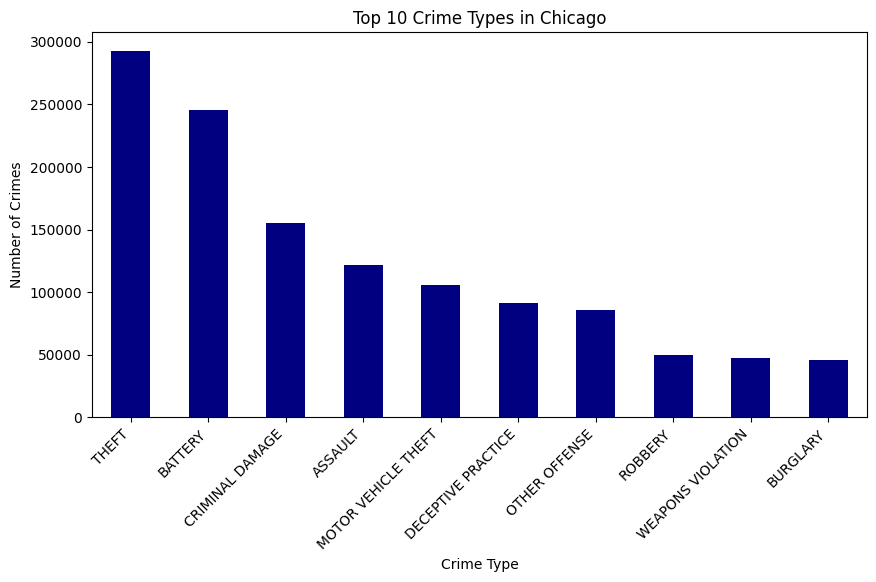

<Figure size 800x500 with 0 Axes>

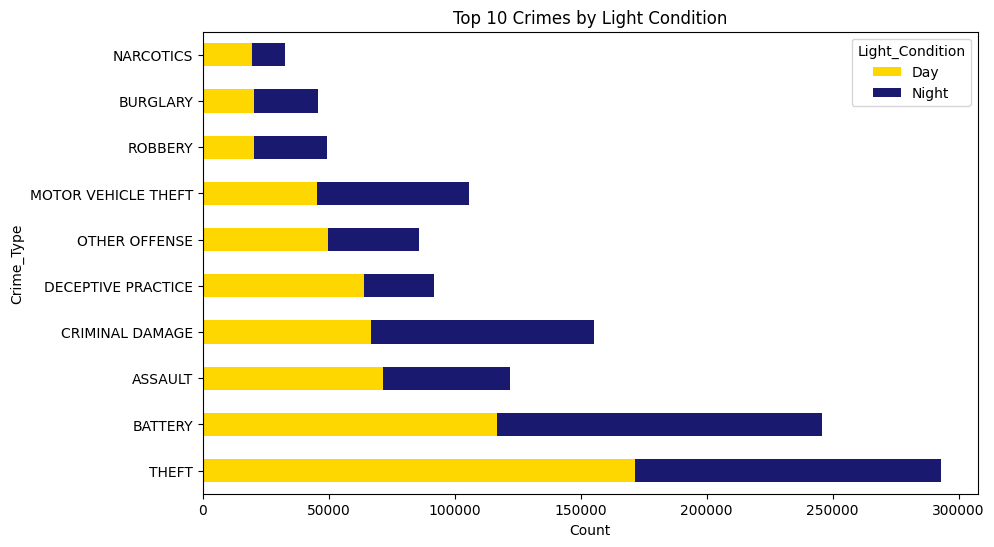

In [31]:
# Top 10 crime types
plt.figure(figsize=(10,5))
df['Crime_Type'].value_counts().head(10).plot(kind='bar', color='navy')
plt.title('Top 10 Crime Types in Chicago')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')
plt.xticks(rotation=45, ha='right')
plt.show()

# Crime Type by Day/Night
plt.figure(figsize=(8,5))
pd.crosstab(df['Crime_Type'], df['Light_Condition']).sort_values(by='Day', ascending=False).head(10).plot(
    kind='barh', stacked=True, figsize=(10,6), color=['gold', 'midnightblue'])
plt.title('Top 10 Crimes by Light Condition')
plt.xlabel('Count')
plt.show()


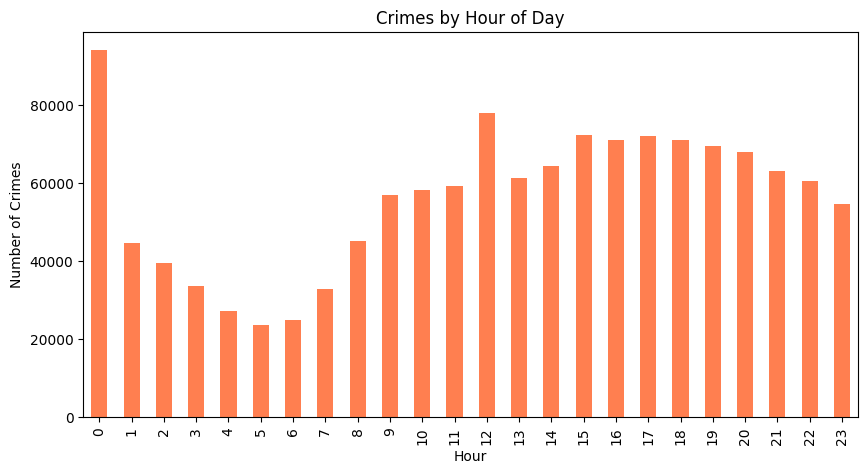

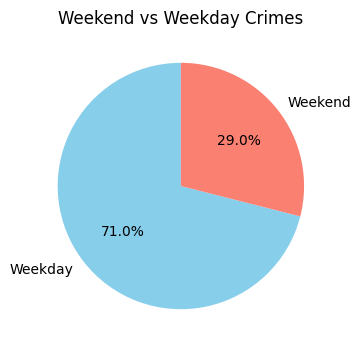

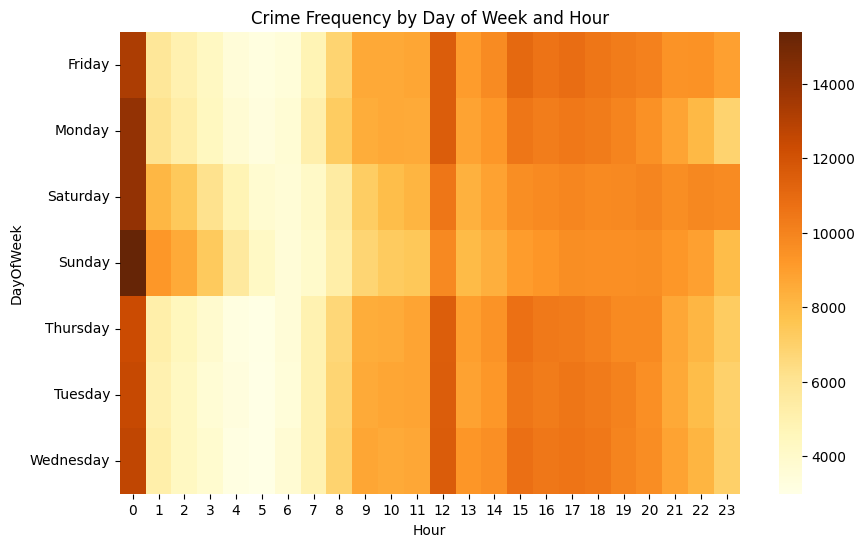

In [32]:
# Crimes by Hour of Day
plt.figure(figsize=(10,5))
df['Hour'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

# Weekend vs Weekday Crimes
plt.figure(figsize=(6,4))
df['IsWeekend'].value_counts().plot(kind='pie', labels=['Weekday','Weekend'], autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title('Weekend vs Weekday Crimes')
plt.ylabel('')
plt.show()

# Crimes per DayOfWeek and Hour heatmap
import seaborn as sns
plt.figure(figsize=(10,6))
heat = pd.crosstab(df['DayOfWeek'], df['Hour'])
sns.heatmap(heat, cmap='YlOrBr')
plt.title('Crime Frequency by Day of Week and Hour')
plt.show()


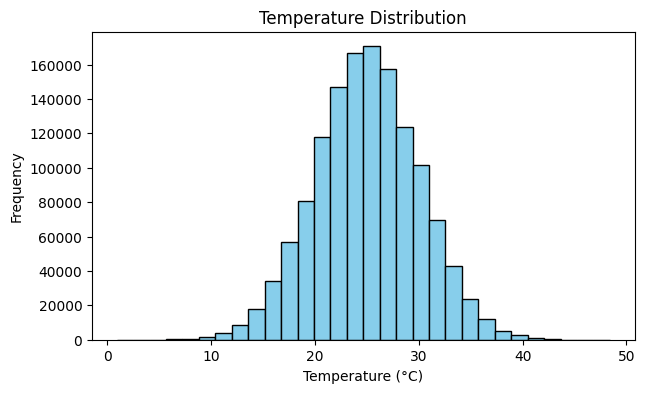

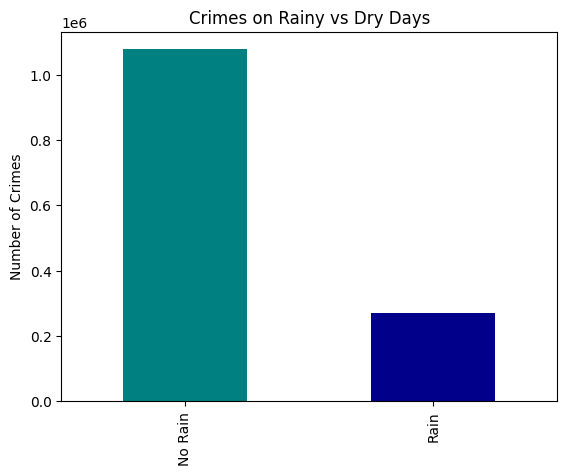

/var/folders/40/xpskrwgs1l1734zl9j0227hw0000gn/T/ipykernel_5450/3092997533.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Light_Condition', y='Temperature', data=df, palette='coolwarm')


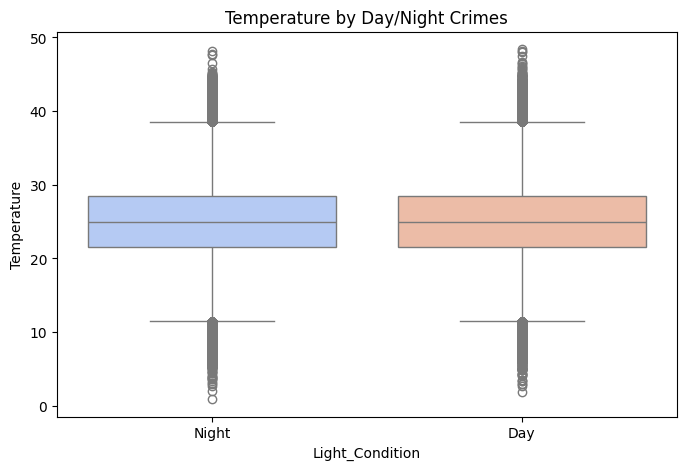

In [33]:
# Temperature distribution
plt.figure(figsize=(7,4))
plt.hist(df['Temperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Rain vs Crime count
rain_counts = df.groupby('Rain')['Crime_Type'].count()
rain_counts.index = ['No Rain', 'Rain']
rain_counts.plot(kind='bar', color=['teal','darkblue'])
plt.title('Crimes on Rainy vs Dry Days')
plt.ylabel('Number of Crimes')
plt.show()

# Temperature vs Crime frequency (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='Light_Condition', y='Temperature', data=df, palette='coolwarm')
plt.title('Temperature by Day/Night Crimes')
plt.show()


/var/folders/40/xpskrwgs1l1734zl9j0227hw0000gn/T/ipykernel_5450/2931955527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Zone', data=df, palette='viridis')


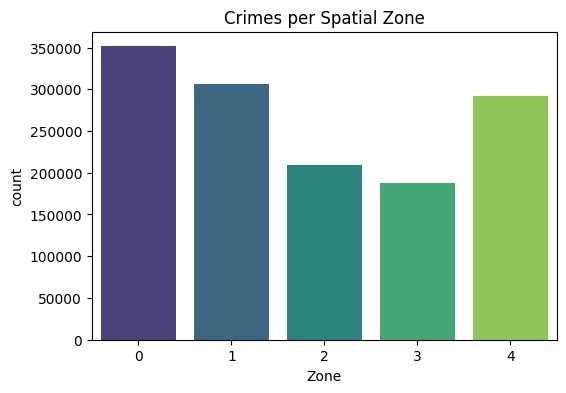

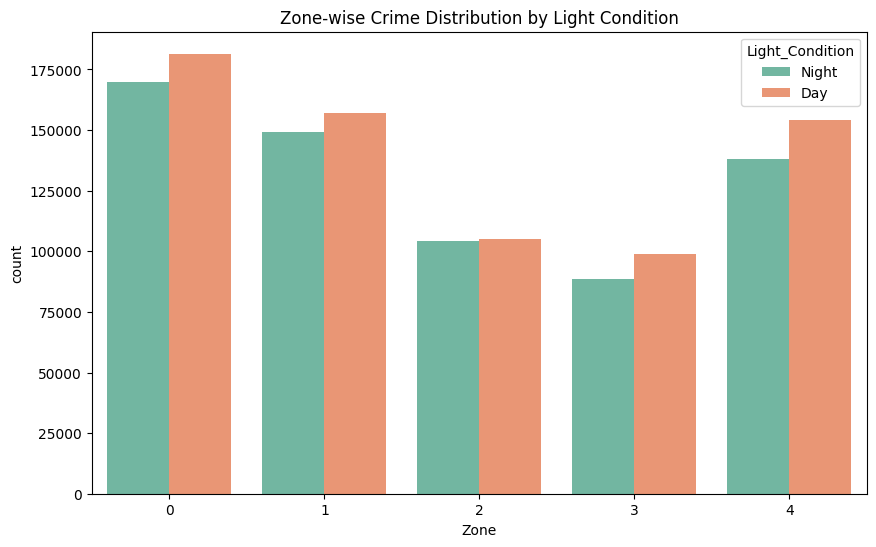

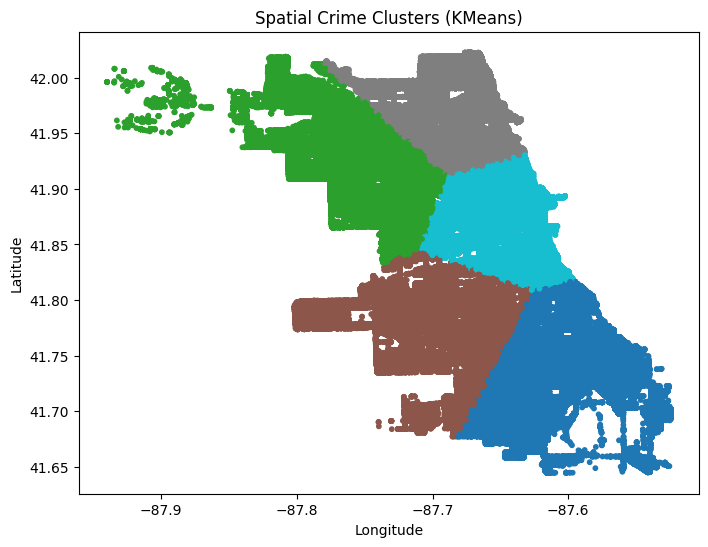

In [34]:
# Crimes per Zone
plt.figure(figsize=(6,4))
sns.countplot(x='Zone', data=df, palette='viridis')
plt.title('Crimes per Spatial Zone')
plt.show()

# Zone vs Crime Type
plt.figure(figsize=(10,6))
sns.countplot(x='Zone', hue='Light_Condition', data=df, palette='Set2')
plt.title('Zone-wise Crime Distribution by Light Condition')
plt.show()

# Optional: Scatter plot of clustered zones
plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Zone'], cmap='tab10', s=10)
plt.title('Spatial Crime Clusters (KMeans)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


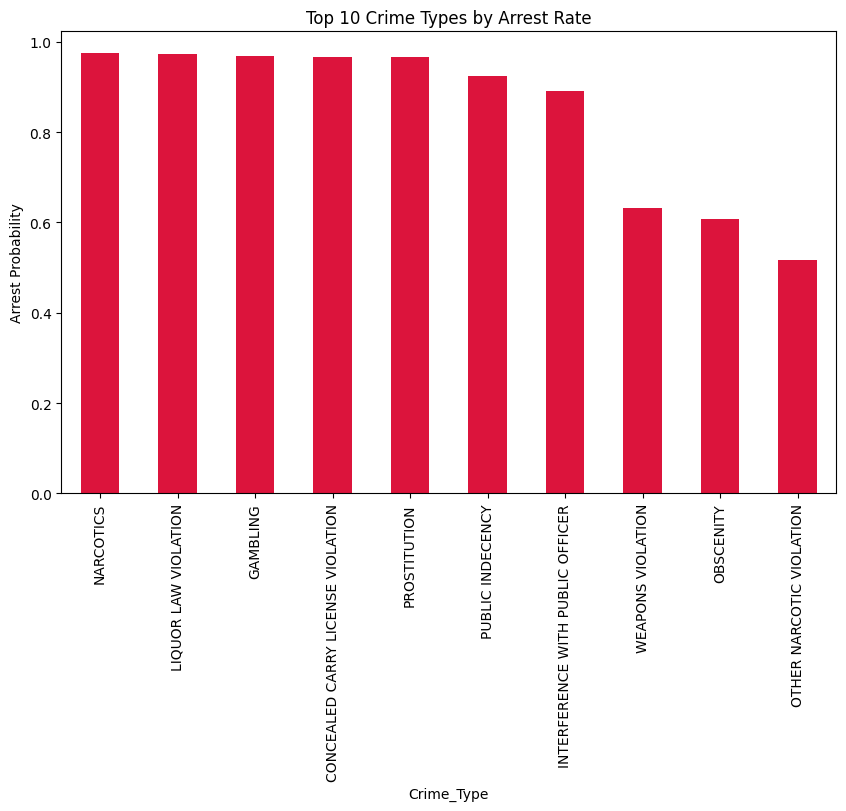

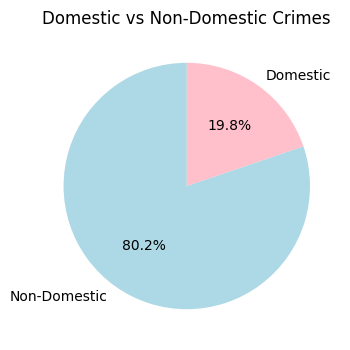

In [35]:
# Arrest rate by Crime Type
plt.figure(figsize=(10,6))
arrest_rate = df.groupby('Crime_Type')['Arrest'].mean().sort_values(ascending=False).head(10)
arrest_rate.plot(kind='bar', color='crimson')
plt.title('Top 10 Crime Types by Arrest Rate')
plt.ylabel('Arrest Probability')
plt.show()

# Domestic vs Non-Domestic Crimes
plt.figure(figsize=(5,4))
df['Domestic'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Non-Domestic','Domestic'], colors=['lightblue','pink'])
plt.title('Domestic vs Non-Domestic Crimes')
plt.ylabel('')
plt.show()


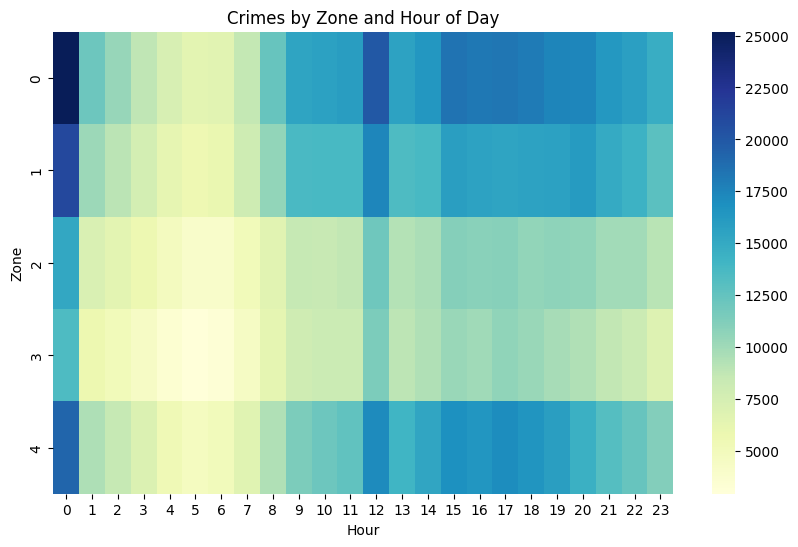

In [36]:
# Zone vs Hour heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['Zone'], df['Hour']), cmap='YlGnBu')
plt.title('Crimes by Zone and Hour of Day')
plt.show()
